<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/assignment3/CRISP_DM_Data_prepartion%2C_Model_building%2C_Test_and_evaluation%2C_and_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the convience, I will do the rest steps in one colab

##CRISP-DM: Data prepartion, Model building, Test and evaluation, and Deployment



## Data prepartion

In [107]:
import pandas as pd

df = pd.read_csv('loans_train.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

let's clean null data from the dataset

In [109]:
df.dropna(inplace=True,how='any')
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [110]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [111]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

I need to change data types object and float64 to int 64

In [112]:
from sklearn.preprocessing import LabelEncoder

def changetoInt(df, column_name):

    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(df[column_name])
    df[column_name] = encoded_column
    return df

In [113]:
# Using function to encoding of data
changetoInt(df,'Gender')
changetoInt(df,'Married')
changetoInt(df,'Self_Employed')
changetoInt(df,'Education')
changetoInt(df,'Loan_Status')
changetoInt(df,'Property_Area')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [114]:
df['Dependents'] = df['Dependents'].str.replace('+', '')

In [115]:
df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']] = df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']].astype(int)


In [116]:
df.dtypes

Loan_ID              object
Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area         int64
Loan_Status           int64
dtype: object

We selected all the usable data and cleaned everything to Int

## Model building

Now we will use pycaret to find out which model we have to use and apply it to data. Lastly, we will the test data to find out whether we can give loan correctly

In [117]:
!pip install pycaret

In [118]:
from pycaret.classification import *

In [119]:
data_setup = setup(df, target='Loan_Status',  train_size = 0.6, session_id=123)

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Original data shape,"(480, 13)"
4,Transformed data shape,"(480, 13)"
5,Transformed train set shape,"(288, 13)"
6,Transformed test set shape,"(192, 13)"
7,Numeric features,11
8,Categorical features,1
9,Preprocess,True


In [120]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8156,0.0000,0.9745,0.8037,0.8799,0.4965,0.5525,0.2530
lr,Logistic Regression,0.8016,0.7152,0.9592,0.7978,0.8702,0.4623,0.5092,1.5970
nb,Naive Bayes,0.7669,0.7583,0.8992,0.7959,0.8418,0.3985,0.4205,0.2540
et,Extra Trees Classifier,0.7499,0.6875,0.9795,0.7421,0.8438,0.2672,0.3681,0.5850
dt,Decision Tree Classifier,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.1740
rf,Random Forest Classifier,0.6910,0.7575,1.0000,0.6910,0.8172,0.0000,0.0000,0.6330
qda,Quadratic Discriminant Analysis,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.1450
ada,Ada Boost Classifier,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.1650
gbc,Gradient Boosting Classifier,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.2310
lda,Linear Discriminant Analysis,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.2790


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [121]:
print(best_model)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


Looks like RidgeClassifier is the best here

In [122]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [123]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
1,0.8966,0.0000,0.9500,0.9048,0.9268,0.7507,0.7533
2,0.7586,0.0000,0.9000,0.7826,0.8372,0.3792,0.3934
3,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
4,0.8966,0.0000,1.0000,0.8696,0.9302,0.7339,0.7614
5,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
6,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
7,0.7586,0.0000,1.0000,0.7407,0.8511,0.2827,0.4057
8,0.8214,0.0000,1.0000,0.8000,0.8889,0.4615,0.5477


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [124]:
tune_model_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
1,0.8966,0.0000,0.9500,0.9048,0.9268,0.7507,0.7533
2,0.7586,0.0000,0.9000,0.7826,0.8372,0.3792,0.3934
3,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
4,0.8966,0.0000,1.0000,0.8696,0.9302,0.7339,0.7614
5,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
6,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
7,0.7586,0.0000,1.0000,0.7407,0.8511,0.2827,0.4057
8,0.8214,0.0000,1.0000,0.8000,0.8889,0.4615,0.5477


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [125]:
predict_model(tune_model_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7969,0.6789,0.9850,0.7798,0.8704,0.4286,0.4992


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction_label
211,LP001711,1,1,3,0,0,3430,1250,128,360,0,1,0,0
182,LP001636,1,1,0,0,0,4600,0,73,180,1,1,1,1
115,LP001401,1,1,1,0,0,14583,0,185,180,1,0,1,1
243,LP001807,1,1,2,0,1,6250,1300,108,360,1,0,1,1
531,LP002720,1,1,3,0,0,4281,0,100,360,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,LP002467,1,1,0,0,0,3708,2569,173,360,1,2,0,1
329,LP002087,0,0,0,0,0,2500,0,67,360,1,2,1,1
390,LP002255,1,0,3,0,0,9167,0,185,360,1,0,1,1
537,LP002738,1,0,2,0,0,3617,0,107,360,1,1,1,1


In [126]:
final_model_ridge = finalize_model(tune_model_ridge)
print(final_model_ridge)


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Gender', 'Married', 'Dependents',
                                             'Education', 'Self_Employed',
                                             'ApplicantIncome',
                                             'CoapplicantIncome', 'LoanAmount',
                                             'Loan_Amount_Term',
                                             'Credit_History',
                                             'Property_Area'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_em...
                                    transformer=TargetEncoder(cols=['Loan_I

In [127]:
predict_model(final_model_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7969,0.6789,0.9850,0.7798,0.8704,0.4286,0.4992


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction_label
211,LP001711,1,1,3,0,0,3430,1250,128,360,0,1,0,0
182,LP001636,1,1,0,0,0,4600,0,73,180,1,1,1,1
115,LP001401,1,1,1,0,0,14583,0,185,180,1,0,1,1
243,LP001807,1,1,2,0,1,6250,1300,108,360,1,0,1,1
531,LP002720,1,1,3,0,0,4281,0,100,360,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,LP002467,1,1,0,0,0,3708,2569,173,360,1,2,0,1
329,LP002087,0,0,0,0,0,2500,0,67,360,1,2,1,1
390,LP002255,1,0,3,0,0,9167,0,185,360,1,0,1,1
537,LP002738,1,0,2,0,0,3617,0,107,360,1,1,1,1


## Testing and Evaluation

Now test with test dataset

In [ ]:
dftest = pd.read_csv("loans_test.csv")
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
dftest.dropna(inplace=True,how='any')

In [ ]:
changetoInt(dftest,'Gender')
changetoInt(dftest,'Married')
changetoInt(dftest,'Self_Employed')
changetoInt(dftest,'Education')
changetoInt(dftest,'Property_Area')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,0,0,2269,2167,99.0,360.0,1.0,1
362,LP002971,1,1,3+,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [ ]:
dftest['Dependents'] = dftest['Dependents'].str.replace('+', '')

In [ ]:
# Chnging datatypes of columns
dftest[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']] = dftest[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']].astype(int)

In [ ]:
pred_holdouts = predict_model(ridge,data=dftest)
pred_holdouts

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_label
0,LP001015,1,1,0,0,0,5720,0,110,360,1,2,1
1,LP001022,1,1,1,0,0,3076,1500,126,360,1,2,1
2,LP001031,1,1,2,0,0,5000,1800,208,360,1,2,1
4,LP001051,1,0,0,1,0,3276,0,78,360,1,2,1
5,LP001054,1,1,0,1,1,2165,3422,152,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,0,0,2269,2167,99,360,1,1,1
362,LP002971,1,1,3,1,1,4009,1777,113,360,1,2,1
363,LP002975,1,1,0,0,0,4158,709,115,360,1,2,1
365,LP002986,1,1,0,0,0,5000,2393,158,360,1,0,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

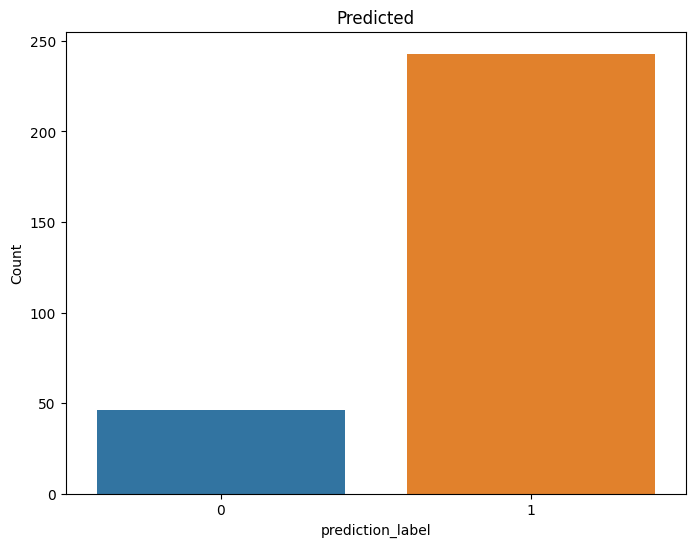

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='prediction_label', data=pred_holdouts)
plt.title('Predicted')
plt.xlabel('prediction_label')
plt.ylabel('Count')
plt.show()

In [129]:
pred_holdouts.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_label
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,0.795848,0.647059,0.802768,0.224913,0.110727,4637.352941,1528.262976,136.792388,342.671280,0.840830,1.083045,0.840830
std,0.403780,0.478714,1.063533,0.418250,0.314338,4790.683934,2377.599209,59.699582,65.655503,0.366469,0.833348,0.366469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2875.000000,0.000000,102.000000,360.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3833.000000,879.000000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5000.000000,2400.000000,158.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,460.000000,480.000000,1.000000,2.000000,1.000000


In [139]:
approved = pred_holdouts.loc[pred_holdouts['prediction_label'] == 1]
unapproved = pred_holdouts.loc[pred_holdouts['prediction_label'] == 0]

approved.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_label
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.00000,243.000000,243.0,243.000000,243.0
mean,0.802469,0.666667,0.790123,0.213992,0.123457,4818.053498,1430.576132,136.17284,341.588477,1.0,1.102881,1.0
std,0.398958,0.472377,1.048999,0.410968,0.329640,5128.301555,2026.722854,62.29710,63.641521,0.0,0.834256,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.00000,12.000000,1.0,0.000000,1.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,3001.000000,0.000000,100.00000,360.000000,1.0,0.000000,1.0
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3900.000000,820.000000,125.00000,360.000000,1.0,1.000000,1.0
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5090.500000,2387.500000,152.00000,360.000000,1.0,2.000000,1.0
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,14507.000000,460.00000,480.000000,1.0,2.000000,1.0


In [140]:
unapproved.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_label
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.0
mean,0.760870,0.543478,0.869565,0.282609,0.043478,3682.782609,2044.304348,140.065217,348.391304,0.0,0.978261,0.0
std,0.431266,0.503610,1.147145,0.455243,0.206185,2084.144001,3710.191686,43.886927,75.941053,0.0,0.829702,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,6.000000,0.0,0.000000,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2437.750000,0.000000,112.500000,360.000000,0.0,0.000000,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3316.500000,1450.000000,132.000000,360.000000,0.0,1.000000,0.0
75%,1.000000,1.000000,2.000000,1.000000,0.000000,4677.250000,2412.000000,162.750000,360.000000,0.0,2.000000,0.0
max,1.000000,1.000000,3.000000,1.000000,1.000000,12500.000000,24000.000000,300.000000,480.000000,0.0,2.000000,0.0


##Deployment

After using prediction to see unseen data for approval of loans, we can realized that gender, depedents, education, property area do not really reflect to the loan approval. It's more relying on Applicant income and coapplicant income and credit_history.